# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import re

# Scrape information using beautifulsoup

In [2]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
req = requests.get(url)

In [3]:
req

<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
nums = []
for i in soup.findAll('a'):
  nums.append(i)

In [6]:
num_reqs = nums[7:49]

In [7]:
seats = []
for i in range(len(num_reqs)):
  i = re.sub('<[^>]*>', '', str(num_reqs[i])) # Convert Tag to string before applying rege
  seats.append(i)

In [8]:
seats

['240',
 '99',
 '37',
 '29',
 '22',
 '16',
 '12',
 '9',
 '8',
 '7',
 '5',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '7']

In [9]:
names = []
for i in soup.findAll('td'):
  names.append(i)
all_names = names[::4]


In [10]:

party = []
for i in range(len(all_names)):
  i = re.sub('<[^>]*>', '', str(all_names[i])) # Convert Tag to string before applying rege
  party.append(i)

In [11]:
party

['Bharatiya Janata Party - BJP',
 'Indian National Congress - INC',
 'Samajwadi Party - SP',
 'All India Trinamool Congress - AITC',
 'Dravida Munnetra Kazhagam - DMK',
 'Telugu Desam - TDP',
 'Janata Dal  (United) - JD(U)',
 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
 'Nationalist Congress Party – Sharadchandra Pawar - NCPSP',
 'Shiv Sena - SHS',
 'Lok Janshakti Party(Ram Vilas) - LJPRV',
 'Yuvajana Sramika Rythu Congress Party - YSRCP',
 'Rashtriya Janata Dal - RJD',
 'Communist Party of India  (Marxist) - CPI(M)',
 'Indian Union Muslim League - IUML',
 'Aam Aadmi Party - AAAP',
 'Jharkhand Mukti Morcha - JMM',
 'Janasena Party - JnP',
 'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
 'Janata Dal  (Secular) - JD(S)',
 'Viduthalai Chiruthaigal Katchi - VCK',
 'Communist Party of India - CPI',
 'Rashtriya Lok Dal - RLD',
 'Jammu &amp; Kashmir National Conference - JKN',
 'United People’s Party, Liberal - UPPL',
 'Asom Gana Parishad - AGP',
 'Hindustani

In [44]:


party = party[:len(seats)]

df = pd.DataFrame({
     "Party Name": party,
    "Seats of Each Party": seats,



})

In [45]:
df

,Party Name,Seats of Each Party
0,Bharatiya Janata Party - BJP,240
1,Indian National Congress - INC,99
2,Samajwadi Party - SP,37
3,All India Trinamool Congress - AITC,29
4,Dravida Munnetra Kazhagam - DMK,22
5,Telugu Desam - TDP,16
6,Janata Dal (United) - JD(U),12
7,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9
8,Nationalist Congress Party – Sharadchandra Paw...,8
9,Shiv Sena - SHS,7


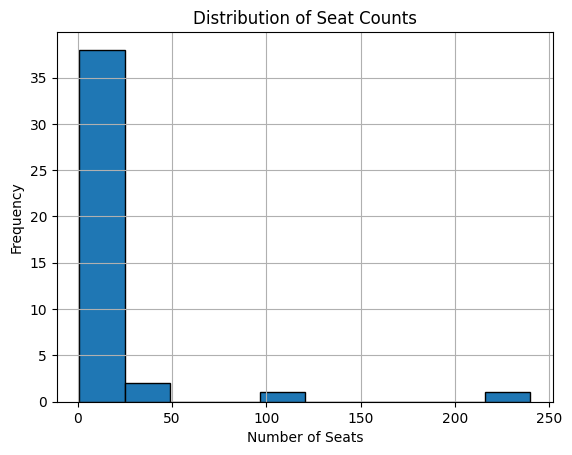

In [47]:
# @title Distribution of Seat Counts

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
plt.figure()
df['Seats of Each Party'].astype(int).hist(bins=10, edgecolor='black')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Seat Counts')

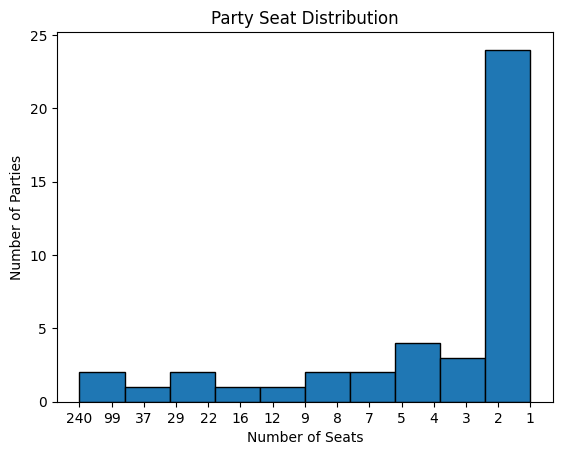

In [46]:
# @title Party Seat Distribution

import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Seats of Each Party'], bins=10, edgecolor='black')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Parties')
_ = plt.title('Party Seat Distribution')

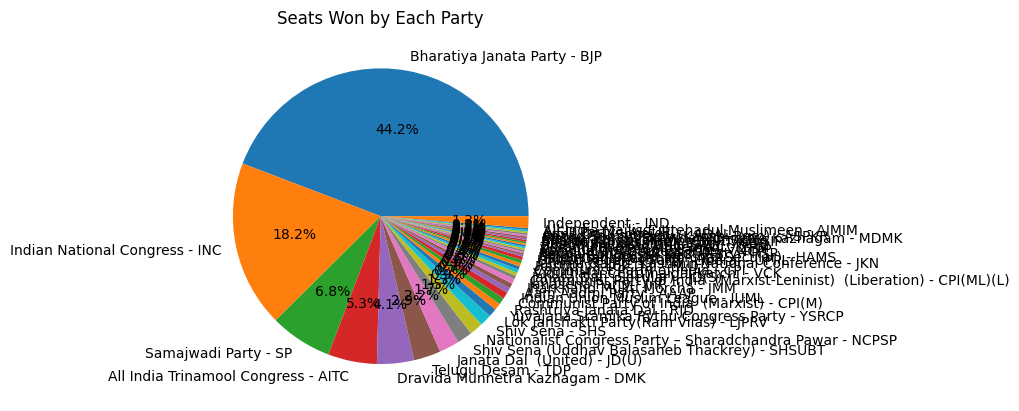

In [41]:
# prompt: create multiple graphs for above data frame that dont require numerical

import matplotlib.pyplot as plt
# Create a pie chart of the seats won by each party
plt.pie(df['Seats of Each Party'], labels=df['Party Name'], autopct='%1.1f%%')
plt.title('Seats Won by Each Party')
plt.show()




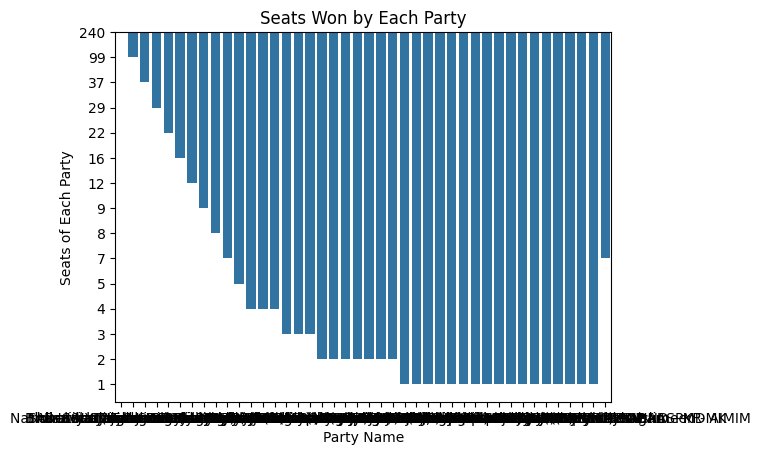

In [40]:
# Create a bar chart of the seats won by each party
sns.barplot(x='Party Name', y='Seats of Each Party', data=df)
plt.title('Seats Won by Each Party')
plt.show()

# National Parties Insights

In [15]:
urlbye = "https://results.eci.gov.in/AcResultByeJune2024/"
req = requests.get(urlbye)

In [17]:
soup = BeautifulSoup(req.content)

In [18]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.PageParams=a.BOOMR_config.PageParams||{

In [19]:
n = []
for i in soup.findAll('h5'):
  n.append(i)

In [20]:

byename = []
for i in range(len(n)):
  i = re.sub('<[^>]*>', '', str(n[i])) # Convert Tag to string before applying rege
  byename.append(i)

In [21]:
byename

['SHIV PRAKASH RANJAN',
 'DR. C. J. CHAVDA',
 'ARJUN DEVABHAI MODHWADIA',
 'ARVINDBHAI JINABHAI LADANI',
 'CHIRAGKUMAR ARVINDBHAI PATEL',
 'DHARMENDRASINH VAGHELA (BAPU)',
 'NAYAB SINGH',
 'SUDHIR SHARMA',
 'ANURADHA RANA',
 'CAPTAIN RANJIT SINGH',
 'INDER DUTT LAKHANPAL',
 'RAKESH KALIA',
 'VIVEK SHARMA (VICKU)',
 'KALPANA MURMU SOREN',
 'RAJA VENUGOPAL NAIK',
 'JAIKRISHN PATEL',
 'THARAHAI CUTHBERT',
 'SRIGANESH',
 'DIPAK MAJUMDER',
 'ARVIND KUMAR SINGH',
 'O. P. SRIVASTAVA',
 'RAKESH KUMAR YADAV',
 'VIJAY SINGH',
 'REYAT HOSSAIN SARKAR',
 'SAYANTIKA BANERJEE']

In [22]:
len(byename)

25

In [23]:
state = []
for i in soup.findAll('h4'):
  state.append(i)

In [24]:

byestates = []
for i in range(len(state)):
  i = re.sub('<[^>]*>', '', str(state[i])) # Convert Tag to string before applying rege
  byestates.append(i)

In [25]:
byestates

['Bihar',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Jharkhand',
 'Karnataka',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttar Pradesh',
 'Uttar Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'West Bengal']

In [26]:
partyn = []
for i in soup.findAll('h6'):
  partyn.append(i)

In [27]:
partyn = partyn[1:26]

In [28]:
partyn

[<h6>Communist Party of India  (Marxist-Leninist)  (Liberation)</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Jharkhand Mukti Morcha</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Bharat Adivasi Party</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Indian National Congress</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Bharatiya Janata Party</h6>,
 <h6>Samajwadi Party</h6>,
 <h6>Samajwadi Party</h6>,
 <h6>All India Trinamool Congress</h6>,
 <h6>All India Trinamool Congress</h6>]

In [29]:
byeparties = []
for i in range(len(partyn)):
  i = re.sub('<[^>]*>', '', str(partyn[i])) # Convert Tag to string before applying rege
  byeparties.append(i)

In [30]:
byeparties

['Communist Party of India  (Marxist-Leninist)  (Liberation)',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Indian National Congress',
 'Indian National Congress',
 'Bharatiya Janata Party',
 'Indian National Congress',
 'Indian National Congress',
 'Jharkhand Mukti Morcha',
 'Indian National Congress',
 'Bharat Adivasi Party',
 'Indian National Congress',
 'Indian National Congress',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Bharatiya Janata Party',
 'Samajwadi Party',
 'Samajwadi Party',
 'All India Trinamool Congress',
 'All India Trinamool Congress']

In [31]:


# Adjust the length of the longest list to match the shortest
min_length = max(len(byename), len(byeparties), len(byestates))
name_bye = byename[:min_length]
party_bye = byeparties[:min_length]
state_bye = byestates[:min_length]

byedf = pd.DataFrame({
    "Party Bye": byeparties,
    "Name Bye": byename,

    "State Bye": byestates
})


In [32]:
byedf

,Party Bye,Name Bye,State Bye
0,Communist Party of India (Marxist-Leninist) ...,SHIV PRAKASH RANJAN,Bihar
1,Bharatiya Janata Party,DR. C. J. CHAVDA,Gujarat
2,Bharatiya Janata Party,ARJUN DEVABHAI MODHWADIA,Gujarat
3,Bharatiya Janata Party,ARVINDBHAI JINABHAI LADANI,Gujarat
4,Bharatiya Janata Party,CHIRAGKUMAR ARVINDBHAI PATEL,Gujarat
5,Bharatiya Janata Party,DHARMENDRASINH VAGHELA (BAPU),Gujarat
6,Bharatiya Janata Party,NAYAB SINGH,Haryana
7,Bharatiya Janata Party,SUDHIR SHARMA,Himachal Pradesh
8,Indian National Congress,ANURADHA RANA,Himachal Pradesh
9,Indian National Congress,CAPTAIN RANJIT SINGH,Himachal Pradesh


from matplotlib import pyplot as plt
import seaborn as sns
byedf.groupby('Party Bye').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<function matplotlib.pyplot.show(close=None, block=None)>

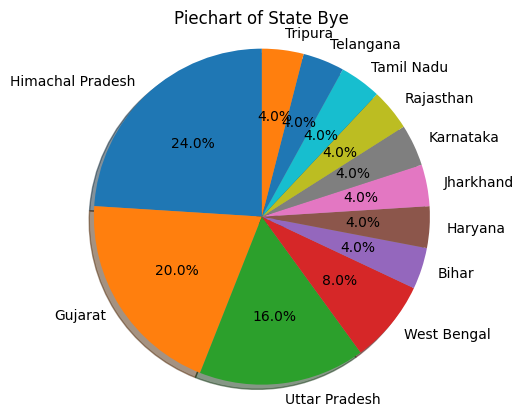

In [60]:
# prompt: Using dataframe byedf: create piechart plt

import matplotlib.pyplot as plt

# Get the data from the dataframe
labels = byedf['State Bye'].value_counts().index.to_list()
sizes = byedf['State Bye'].value_counts().to_list()

# Create the piechart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular piechart
plt.title('Piechart of State Bye')
plt.show

<Axes: xlabel='Party Bye', ylabel='State Bye'>

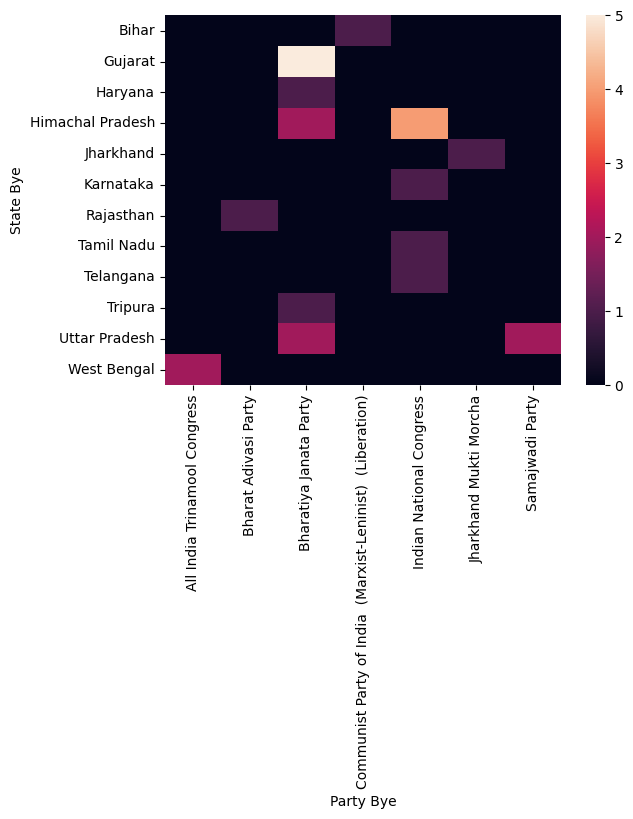

In [57]:
# prompt: Using dataframe byedf: create heatmap

import pandas as pd
import seaborn as sns

# Create a crosstab table
crosstab = pd.crosstab(byedf['State Bye'], byedf['Party Bye'])

# Create a heatmap
sns.heatmap(crosstab)


<Axes: xlabel='Party Bye', ylabel='Name Bye'>

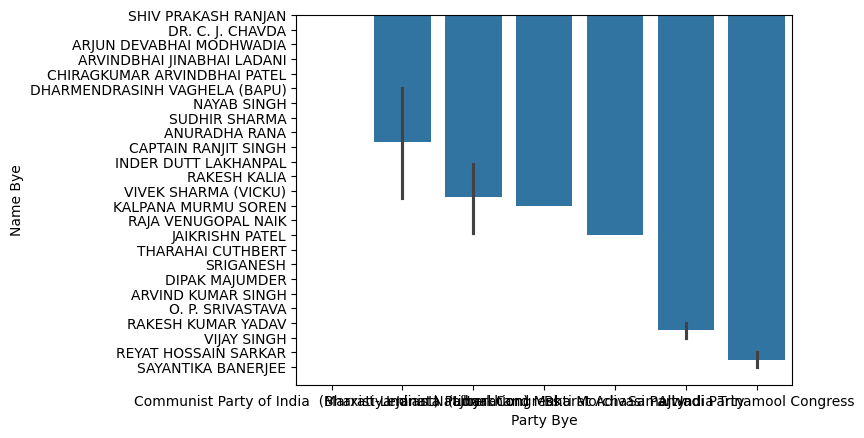

In [52]:
# prompt: Using dataframe byedf: create  using sns graphs

import seaborn as sns

# Create a bar chart of the number of bye elections by party
sns.barplot(x="Party Bye", y="Name Bye", data=byedf)




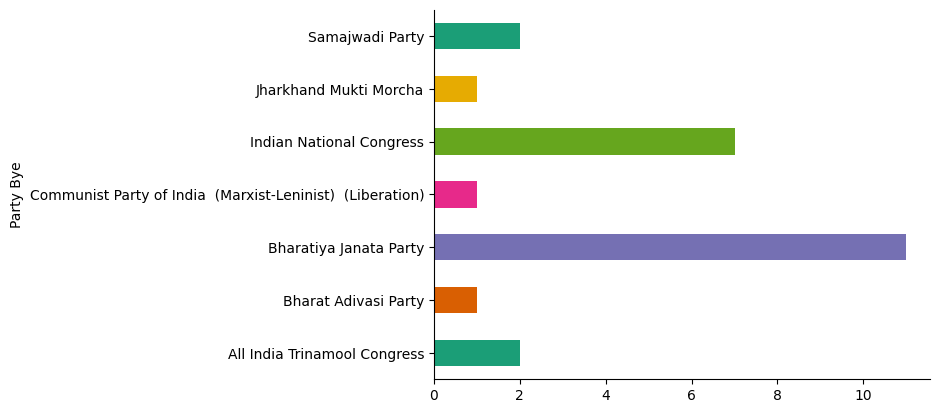

In [33]:
# @title Party Bye

from matplotlib import pyplot as plt
import seaborn as sns
byedf.groupby('Party Bye').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)